In [23]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics 

df = pd.read_csv('FAMA_49CRSP.csv')
df = df.sort_values(by='public_date', ascending=True)

df = df.dropna()

ewlabels = df.indret_ew
vwlabels = df.indret_vw

df = df.drop(labels=['indret_ew', 'indret_vw'], axis=1)

#add -1 and 1 so the bins will take on bins to be equal and set to max -1 and 1
extrema = pd.Series([-1,1])
ewnlabels = ewlabels.append(extrema)

enc = KBinsDiscretizer(n_bins=8, encode='ordinal',strategy = 'uniform')
ewnlabels = np.asarray(ewnlabels)
ewnlabels = ewnlabels.reshape((-1,1))
labels_binned = enc.fit_transform(ewnlabels)

labels_binned = labels_binned[:-2]

# Use label_binarize to be multi-label like settings
y_binarized = label_binarize(labels_binned, classes=[x for x in range(8)])
n_classes = y_binarized.shape[1]

#1 Split-Timer series data, 0.64 Train, 0.16 dev, 0.2 Test
x_train, x_test, y_train, y_test = train_test_split(df, y_binarized, test_size = 0.2, shuffle = False)
x_train, x_dev, y_train, y_dev = train_test_split(x_train, y_train, test_size = 0.2, shuffle = False)

/home/klchou/.local/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/home/klchou/.local/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 1 is present in all training examples.
  str(classes[c]))
/home/klchou/.local/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 7 is present in all training examples.
  str(classes[c]))
/home/klchou/.local/lib/python3.6/site-packages/sklearn/metrics/ranking.py:521: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Average precision score, micro-averaged over all classes: 0.46


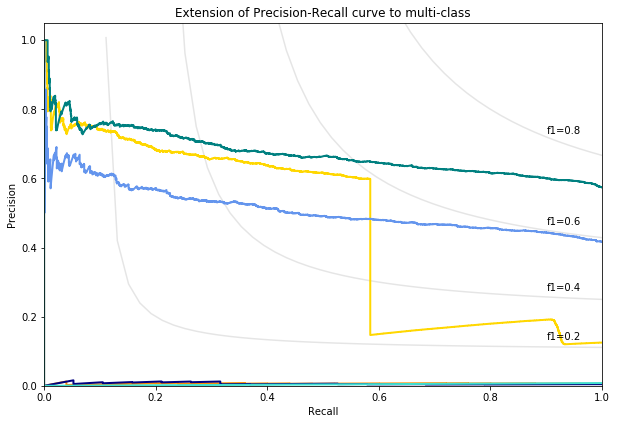

In [26]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

import matplotlib.pyplot as plt 

colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

x_train = preprocessing.scale(x_train)
x_dev = preprocessing.scale(x_dev)
x_test = preprocessing.scale(x_test)

ovrclf = OneVsRestClassifier(svm.SVC(gamma='scale', decision_function_shape='ovr', kernel='rbf'))
ovrclf.fit(x_train, y_train)
    
y_trainpred = ovrclf.predict(x_train)
y_devpred = ovrclf.predict(x_dev)
y_testpred = ovrclf.predict(x_test)
    
y_score = ovrclf.decision_function(x_test)

precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score,
                                                         average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))
    
plt.figure(figsize=(10, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))   

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')

plt.show()

In [27]:
from sklearn.metrics import roc_auc_score

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average) 

roc_auc_score(y_test, y_testpred, average=average) 

IndentationError: unexpected indent (<ipython-input-27-b62d38102a81>, line 5)